In [3]:
import pandas as pd 
import numpy as np

In [4]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r'D:\Data Science\udemy\Notebooks\DATA\hearing_test.csv')

In [6]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [7]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [8]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

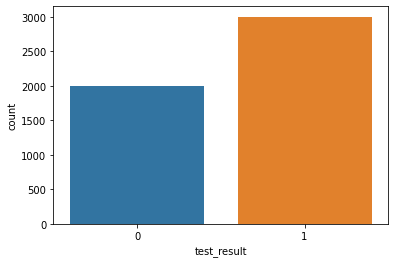

In [9]:
sns.countplot(data = df, x = 'test_result')
plt.show()

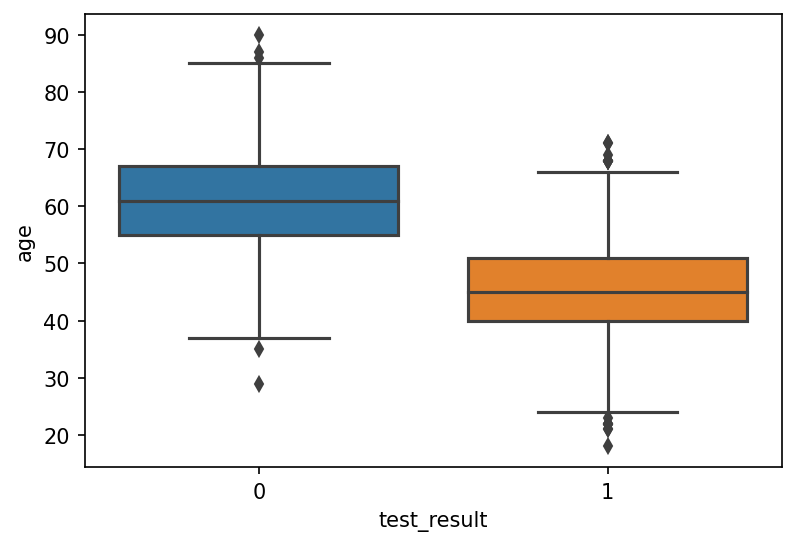

In [10]:
plt.figure(dpi=150)
sns.boxplot(x='test_result', y='age', data=df)
plt.show()

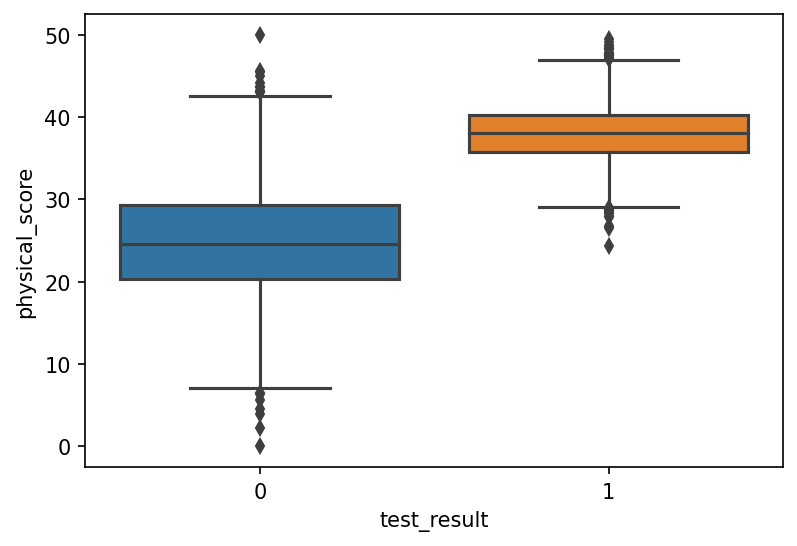

In [11]:
plt.figure(dpi=150)
sns.boxplot(x='test_result', y='physical_score', data=df)
plt.show()

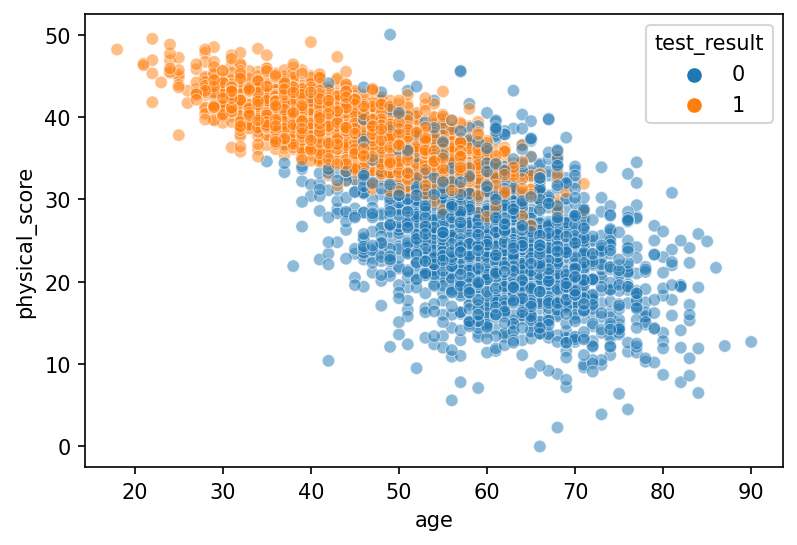

In [12]:
plt.figure(dpi=150)
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.5)
plt.show()

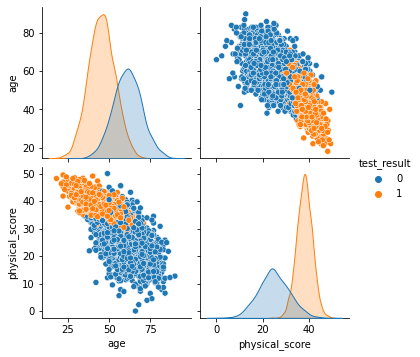

In [13]:
sns.pairplot(df, hue='test_result')
plt.show()

<AxesSubplot:>

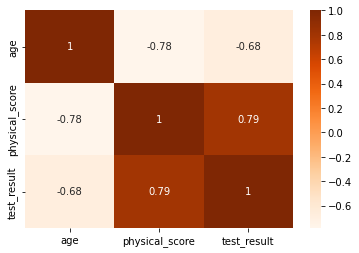

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='Oranges')

In [15]:
from mpl_toolkits.mplot3d import Axes3D

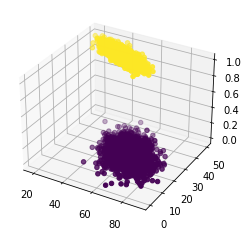

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'])
plt.show()

In [17]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=
                                                   101)

In [21]:
scaler = StandardScaler()

In [22]:
scaler_X_train = scaler.fit_transform(X_train)

In [23]:
scaler_X_test = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [26]:
log_model = LogisticRegression()

In [27]:
log_model.fit(scaler_X_train, y_train)

LogisticRegression()

In [28]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [29]:
y_pred = log_model.predict_proba(scaler_X_test)

In [30]:
y_pred

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
y_pred = log_model.predict(scaler_X_test)

In [34]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [45]:
from sklearn.metrics import plot_confusion_matrix, classification_report

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


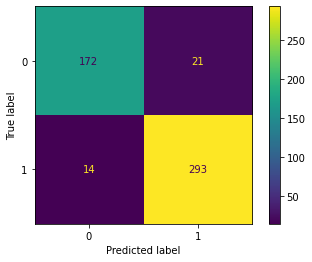

In [46]:
plot_confusion_matrix(log_model, scaler_X_test, y_test)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [49]:
from sklearn.metrics import precision_score, recall_score

In [50]:
precision_score(y_test, y_pred)

0.9331210191082803

In [51]:
recall_score(y_test, y_pred)

0.9543973941368078

In [55]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


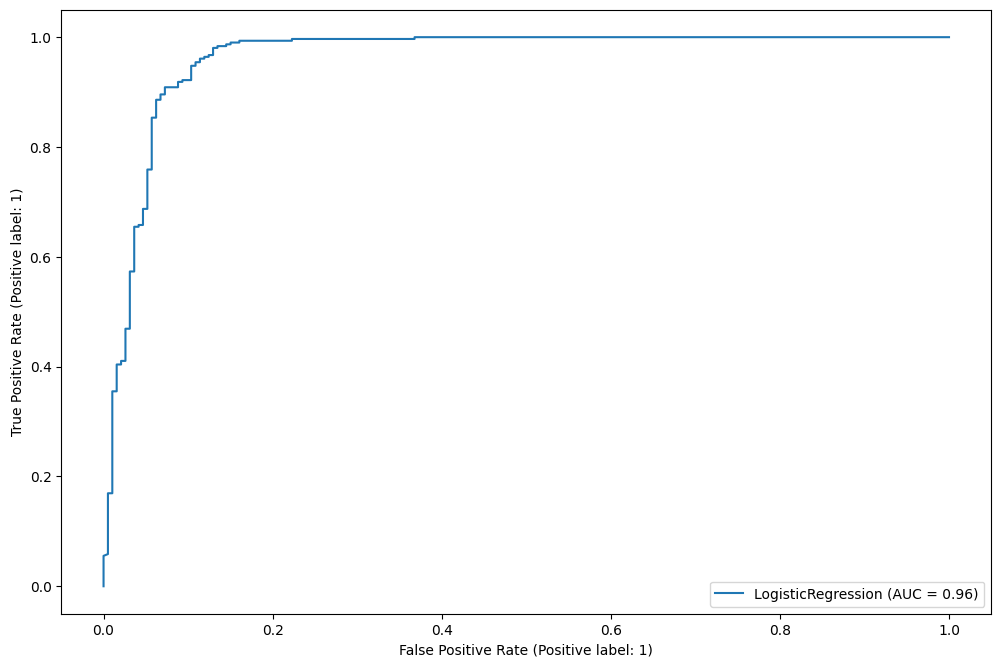

In [60]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
plot_roc_curve(log_model, scaler_X_test, y_test, ax=ax)
plt.show()

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


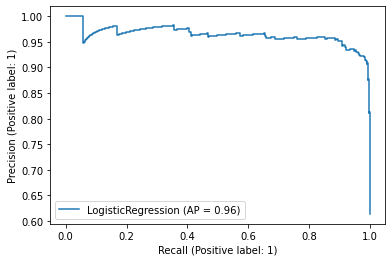

In [62]:
plot_precision_recall_curve(log_model, scaler_X_test, y_test)
plt.show()